## 1 Business Understanding

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, users are able to easily rent a bike from a particular position and return back to another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. <br><br>
Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of
the important events in the city could be detected via monitoring these data. 
This dataset contains the hourly and daily count of rental bikes between 2011 and 2012 in the Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information. 

### 1.1 Objective 

Identify key finding(s) from the data that would help drive more revenue to the business and share this finding with an executive team audience in a way that you see fit.

### 1.2 Methodology

To tackle this business analysis, it will be used the CRISP-DM methodology. <br><br>


## 2 Data Understanding
### 2.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import datapane as dp
import plotly.express as px

%matplotlib inline

In [3]:
pd.set_option("display.max.columns", None) # Allows visualization of all columns in the dataframe
pd.set_option("display.precision", 3) # Sets decimal precision to 3 places

### 2.2 Collect Data

In [4]:
df=pd.read_csv('Case Study - BI Analyst Wunderflats (Dataset).csv')

### 2.3 Describe and Explore Data

In [5]:
df.shape # Check shape

(17379, 17)

In [6]:
df.describe() # Describe quick statistical facts about this dataframe

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000
mean,8690.000,2.502,0.503,6.538,11.547,0.029,3.004,0.683,1.425,0.497,0.476,0.627,0.190,35.676,153.787,189.463
std,5017.029,1.107,0.500,3.439,6.914,0.167,2.006,0.465,0.639,0.193,0.172,0.193,0.122,49.305,151.357,181.388
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.020,0.000,0.000,0.000,0.000,0.000,1.000
25%,4345.500,2.000,0.000,4.000,6.000,0.000,1.000,0.000,1.000,0.340,0.333,0.480,0.104,4.000,34.000,40.000
50%,8690.000,3.000,1.000,7.000,12.000,0.000,3.000,1.000,1.000,0.500,0.485,0.630,0.194,17.000,115.000,142.000
75%,13034.500,3.000,1.000,10.000,18.000,0.000,5.000,1.000,2.000,0.660,0.621,0.780,0.254,48.000,220.000,281.000
max,17379.000,4.000,1.000,12.000,23.000,1.000,6.000,1.000,4.000,1.000,1.000,1.000,0.851,367.000,886.000,977.000


**Takeaways:**  
- temp, atemp, hum are normalized columns.
- cannot determine windspeed scale (it's not knots, km/h, m/s, mph due to it's low values for earth atmosphere). Most likely is a subset of a greater normalized set.
- 4 categories of weathersit

In [7]:
df.describe(include=object) # Describe non numeric columns statistics

,dteday
count,17379
unique,731
top,2012-04-20
freq,24


In [8]:
df.head(30) # Dataframe's head glimpse 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.288,0.81,0.000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.273,0.80,0.000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.273,0.80,0.000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.288,0.75,0.000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.288,0.75,0.000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.258,0.75,0.090,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.273,0.80,0.000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.258,0.86,0.000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.288,0.75,0.000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.348,0.76,0.000,8,6,14


In [9]:
df.tail(30) # Dataframe's tail glimpse 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17349,17350,2012-12-30,1,1,12,18,0,0,0,2,0.24,0.212,0.44,0.298,12,113,125
17350,17351,2012-12-30,1,1,12,19,0,0,0,1,0.34,0.364,0.61,0.000,16,86,102
17351,17352,2012-12-30,1,1,12,20,0,0,0,1,0.22,0.197,0.47,0.328,9,63,72
17352,17353,2012-12-30,1,1,12,21,0,0,0,1,0.20,0.212,0.51,0.164,5,42,47
17353,17354,2012-12-30,1,1,12,22,0,0,0,1,0.20,0.197,0.55,0.194,6,30,36
17354,17355,2012-12-30,1,1,12,23,0,0,0,1,0.20,0.197,0.51,0.224,10,39,49
17355,17356,2012-12-31,1,1,12,0,0,1,1,1,0.18,0.182,0.55,0.194,4,30,34
17356,17357,2012-12-31,1,1,12,1,0,1,1,1,0.18,0.182,0.55,0.194,6,13,19
17357,17358,2012-12-31,1,1,12,2,0,1,1,1,0.16,0.167,0.59,0.164,3,8,11
17358,17359,2012-12-31,1,1,12,3,0,1,1,1,0.16,0.182,0.59,0.104,0,1,1


**Takeaways**: the unique key of this dataframe is the combination of 'dteday'+'hr' columns

In [10]:
df.info() # Verify data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Takeaways**: 'dteday' has the wrong datetype

(array([4821., 2151., 1917., 1788., 1493., 1166.,  931.,  729.,  542.,
         445.,  371.,  292.,  203.,  166.,  119.,   69.,   80.,   59.,
          25.,   12.]),
 array([  1. ,  49.8,  98.6, 147.4, 196.2, 245. , 293.8, 342.6, 391.4,
        440.2, 489. , 537.8, 586.6, 635.4, 684.2, 733. , 781.8, 830.6,
        879.4, 928.2, 977. ]),
 <BarContainer object of 20 artists>)

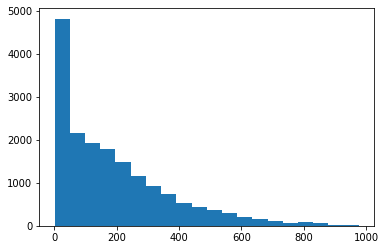

In [11]:
plt.hist(df.cnt, bins=20) # Quick histogram of 'cnt' column

**Takeaways:** reciprocal curve

<AxesSubplot:>

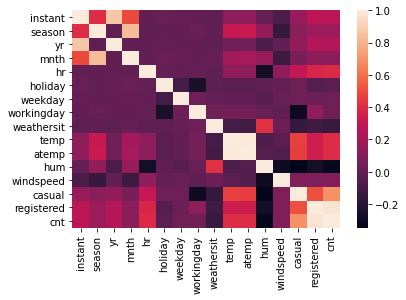

In [12]:
sns.heatmap(df.corr())

**Takeaways:** temp, atemp and hr have a positive moderate correlation with cnt.

### 2.4 Verify Data Quality

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Takeaways**: no missing values in any column

## 3 Data Preparation

### 3.1 Select relevant data & clean

In [14]:
def normalize_col(df,col):
    '''
    Normalize a column from a dataframe.

    Input:
        df - Pandas dataframe with desired column to be normalized.
        col - Column name (string).
    
    Output:
        normalized - normalized column.
    '''
    x=df[col]
    xmax=x.max()
    xmin=x.min()

    normalized=(xmax-x)/(xmax-xmin)

    return normalized

def create_daytype_column(df):
    '''
    Create costumn daytype column, which can assume one of four values:
    
        0 - Holiday False and Workingday False. 
        1 - Holiday True and Workingday False.
        2 - Holiday False and Workingday True.
        3 - Holiday True and Workingday True.

    Input:
        df - Pandas dataframe with holiday and workingday binary columns.
    
    Output: 
        None.
        
    ''' 
    df['daytype'] = df['holiday']+2*df['workingday']
    df['daytype'] = df.daytype.apply(rename_daytype)

def rename_daytype(x):
    '''
    Rename daytype column to:
    
        'weekendday' - Holiday False and Workingday False. 
        'holiday' - Holiday True and Workingday False.
        'workingday' - Holiday False and Workingday True.

    Input:
        df - Pandas dataframe with holiday and workingday binary columns.
    
    Output: 
        None.
        
    '''
    if x == 0:
        return 'weekendday'
    elif x == 1:
        return 'holiday'
    elif x == 2:
        return 'workingday'
    else:
        return 'nonclassified'

In [15]:
df_clean = df.drop(columns='instant') # Drop unnecessary columns for analysis
df_clean['dteday'] = pd.to_datetime(df_clean['dteday']+' '+df_clean.hr.astype(str)+':00:00') # Adjust 'dteday' to correct data type
df_clean.insert(4,'day',df_clean.dteday.dt.day) # Create 'day' column in position 4
df_clean.rename(columns={'dteday':'datetime'}, inplace=True) # Rename column 'dteday' to 'datetime'
df_clean.set_index('datetime', inplace=True) # Set 'datetime' as index for faster processing
df_clean.windspeed=normalize_col(df_clean,'windspeed') # Normalize windspeed column
create_daytype_column(df_clean) # Creates 'daytype' column

df_clean

,season,yr,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,daytype
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,1,0,0,6,0,1,0.24,0.288,0.81,1.000,3,13,16,weekendday
2011-01-01 01:00:00,1,0,1,1,1,0,6,0,1,0.22,0.273,0.80,1.000,8,32,40,weekendday
2011-01-01 02:00:00,1,0,1,1,2,0,6,0,1,0.22,0.273,0.80,1.000,5,27,32,weekendday
2011-01-01 03:00:00,1,0,1,1,3,0,6,0,1,0.24,0.288,0.75,1.000,3,10,13,weekendday
2011-01-01 04:00:00,1,0,1,1,4,0,6,0,1,0.24,0.288,0.75,1.000,0,1,1,weekendday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,1,12,31,19,0,1,1,2,0.26,0.258,0.60,0.807,11,108,119,workingday
2012-12-31 20:00:00,1,1,12,31,20,0,1,1,2,0.26,0.258,0.60,0.807,8,81,89,workingday
2012-12-31 21:00:00,1,1,12,31,21,0,1,1,1,0.26,0.258,0.60,0.807,7,83,90,workingday


In [16]:
df_dp = df.drop(columns='instant') # Drop unnecessary columns for analysis
df_dp['dteday'] = pd.to_datetime(df_dp['dteday']+' '+df_dp.hr.astype(str)+':00:00') # Adjust 'dteday' to correct data type
df_dp.insert(4,'day',df_dp.dteday.dt.day) # Create 'day' column in position 4
df_dp.rename(columns={'dteday':'datetime'}, inplace=True) # Rename column 'dteday' to 'datetime'
#df_clean.set_index('datetime', inplace=True) # Set 'datetime' as index for faster processing
df_dp.windspeed=normalize_col(df_dp,'windspeed') # Normalize windspeed column
create_daytype_column(df_dp) # Creates 'daytype' column

df_dp

,datetime,season,yr,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,daytype
0,2011-01-01 00:00:00,1,0,1,1,0,0,6,0,1,0.24,0.288,0.81,1.000,3,13,16,weekendday
1,2011-01-01 01:00:00,1,0,1,1,1,0,6,0,1,0.22,0.273,0.80,1.000,8,32,40,weekendday
2,2011-01-01 02:00:00,1,0,1,1,2,0,6,0,1,0.22,0.273,0.80,1.000,5,27,32,weekendday
3,2011-01-01 03:00:00,1,0,1,1,3,0,6,0,1,0.24,0.288,0.75,1.000,3,10,13,weekendday
4,2011-01-01 04:00:00,1,0,1,1,4,0,6,0,1,0.24,0.288,0.75,1.000,0,1,1,weekendday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,1,12,31,19,0,1,1,2,0.26,0.258,0.60,0.807,11,108,119,workingday
17375,2012-12-31 20:00:00,1,1,12,31,20,0,1,1,2,0.26,0.258,0.60,0.807,8,81,89,workingday
17376,2012-12-31 21:00:00,1,1,12,31,21,0,1,1,1,0.26,0.258,0.60,0.807,7,83,90,workingday
17377,2012-12-31 22:00:00,1,1,12,31,22,0,1,1,1,0.26,0.273,0.56,0.842,13,48,61,workingday


In [17]:
h0w0 = df_clean[df_clean['daytype']=='weekendday'] # holiday FALSE and workingday FALSE
h1w0 = df_clean[df_clean['daytype']=='holiday'] # holiday TRUE and workingday FALSE 
h0w1 = df_clean[df_clean['daytype']=='workingday'] # holiday FALSE and workingday TRUE
h1w1 = df_clean[df_clean['daytype']=='nonclassified'] # holiday TRUE and workingday TRUE

h1w1 # Checking data integrity

,season,yr,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,daytype
datetime,,,,,,,,,,,,,,,,,


No h1w1 dates. This means that there is no day in the data that is holiday and workingday at the same time, which is the desired result.

In [18]:
df_clean.loc[h0w0.index].weekday.unique()

array([6, 0], dtype=int64)

So h0w0 are weekends (just making sure if saturday was considered as a working day or not)

## 4 Modeling

In this section it will be explored possible business relevant information through graphical analysis.

First, let's considerate what graphics could be interesting for such analysis.

1. cnt timeline (with registered and casual tracer + holiday/workingday points + climate subplots) - checks how the business is developing along time and shows possible holiday, workingday effects
2. month+weekday vs hour (heatmap) by 
<br>2.1 cnt average - checks what are the best months+weekday/hour combinations per cnt average regardless of year
<br>2.2 cnt/year average - checks what are the best months+weekday/hour combinations per cnt average according of year
3. cnt by year (bar)
4. avg cnt by weekday (bar)
5. avg cnt by weathersit (bar)

<AxesSubplot:xlabel='datetime'>

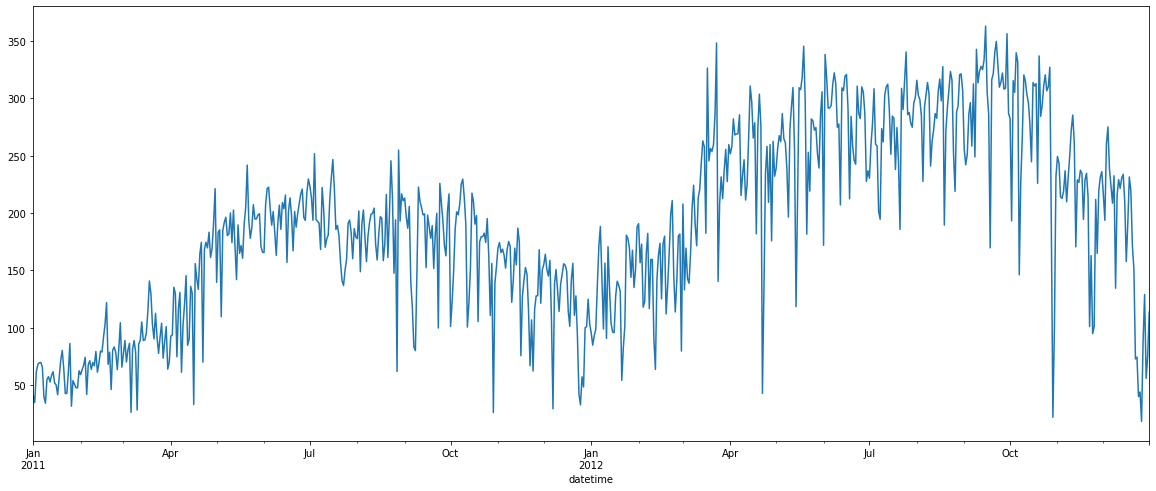

In [19]:
df_clean.resample('D').mean()['cnt'].plot(figsize=(20,8))

Visualization of the data is not great even calculating the average 'cnt' of the day. Still too much variability to see clear trends. Therefore lets use rolling average.

<AxesSubplot:xlabel='datetime'>

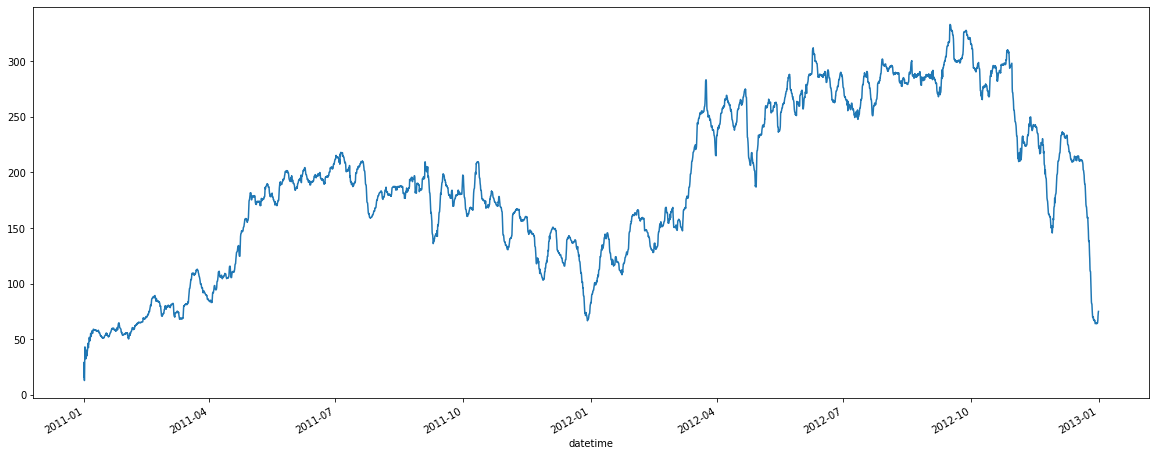

In [20]:
df_clean['cnt'].rolling('7d').mean().plot(figsize=(20,8))

<ipython-input-85-b149e5b927ca>:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-85-b149e5b927ca>:5: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-85-b149e5b927ca>:8: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-85-b149e5b927ca>:9: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



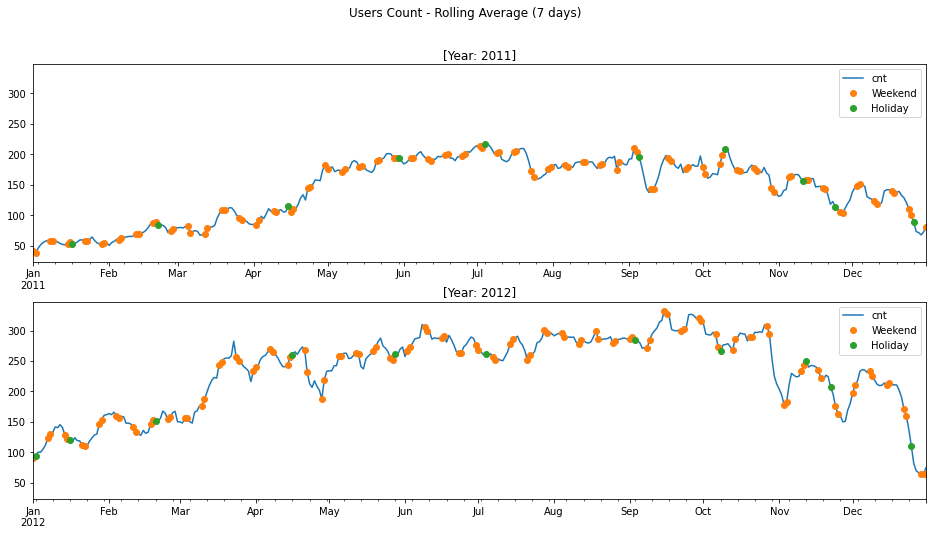

In [85]:
df_roll_7d=df_clean.resample('D').mean().rolling('7d').mean()
plt.rcParams["figure.figsize"] = (16,8)

marker1=df_roll_7d.loc[set(h0w0['2011'].index.date)].cnt
marker2=df_roll_7d.loc[set(h1w0['2011'].index.date)].cnt
line1 = df_roll_7d.cnt['2011']

marker3=df_roll_7d.loc[set(h0w0['2012'].index.date)].cnt
marker4=df_roll_7d.loc[set(h1w0['2012'].index.date)].cnt
line2 = df_roll_7d.cnt['2012']

fig, (ax1, ax2) = plt.subplots(2, sharey=True)

line1.plot(ax=ax1, title='[Year: 2011]', xlabel='')
ax1.plot(marker1,'o', markersize=6, label='Weekend')
ax1.plot(marker2,'o', markersize=6, label='Holiday')

line2.plot(ax=ax2, title='[Year: 2012]', xlabel='')
ax2.plot(marker3,'o', markersize=6, label='Weekend')
ax2.plot(marker4,'o', markersize=6, label='Holiday')

fig.suptitle('Users Count - Rolling Average (7 days)')
ax1.legend()
ax2.legend()
plt.savefig('1')

**Takeaways:** there is no clear behaviour for weekends. On the other hand, holidays aren't in general associated with local maximums or minimums (only 4 points). 

In [22]:
def add_value_labels(ax, spacing=1):
    """
    Add labels to the end of each bar in a bar chart.

    Input:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.

    Output: none.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

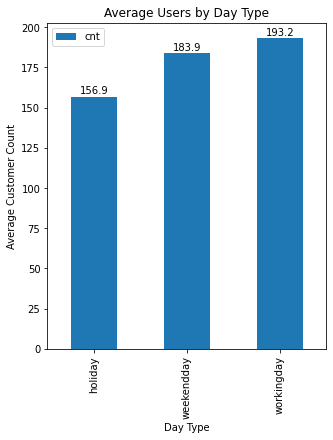

In [84]:
pivot_table1=pd.pivot_table(df_clean, values='cnt', columns='daytype', aggfunc=np.mean)
ax=pivot_table1.T.plot(kind='bar', figsize=(5,6), title='Average Users by Day Type', ylabel='Average Customer Count', xlabel='Day Type')
add_value_labels(ax)
plt.savefig('2')

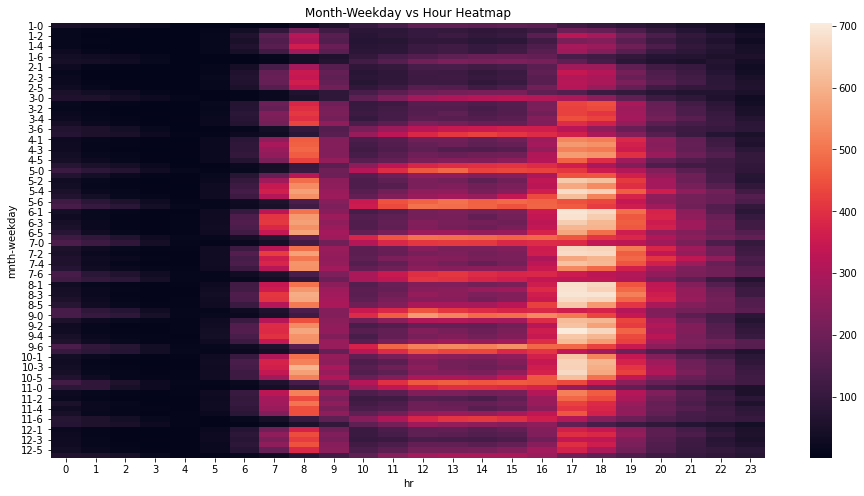

In [86]:
pivot_table2=pd.pivot_table(df_clean, values='cnt', columns='hr', index=['mnth','weekday'], aggfunc=np.mean)
sns.heatmap(pivot_table2)
plt.title('Month-Weekday vs Hour Heatmap')
plt.savefig('3')

This graphic is very interesting. Many important takeaways:<br><br>
1. The busiest hours during working days are from 7 to 8 and 17 to 19.<br>
2. The busiest hours during weekends are from 10 to 17. <br>
3. The busiest weekdays are the workingdays, with an interesting slight decrease on fridays most likely due to what I will call Happy Hour Effect (HHE). The evidence that supports the hyphoteses that is related to happy hours or parties is because it's possible to see a slight increase in users from 0 to 2 hour in saturdays and sundays, but we don't see the same increase in this hours during working days. <br>
4. The months of december, january, and february have a lower demand compared to the other months. On the other hand, the month with most average users is in August.
5. 3 to 5 AM are the hours with least users. A good moment to make maintenance of the bikes.

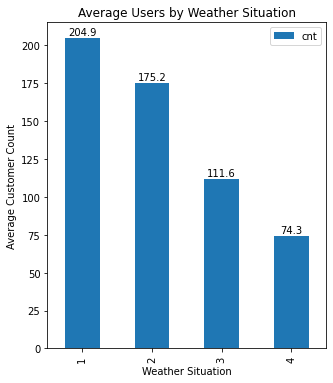

In [87]:
pivot_table3=pd.pivot_table(df_clean, values='cnt', columns='weathersit', aggfunc=np.mean)
ax=pivot_table3.T.plot(kind='bar', figsize=(5,6), title='Average Users by Weather Situation', ylabel='Average Customer Count', xlabel='Weather Situation')
add_value_labels(ax)
plt.savefig('4')

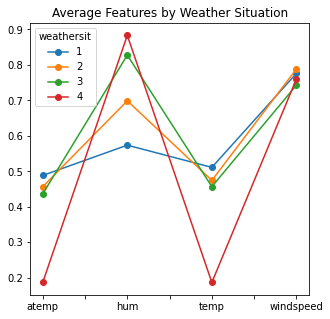

In [88]:
pivot_table4=pd.pivot_table(df_clean, values=['hum','atemp','temp','windspeed'], index='weathersit', aggfunc=np.mean)
pivot_table4.T.plot(figsize=(5,5), marker='o')
plt.title('Average Features by Weather Situation')
plt.savefig('5')

**Takeaways:**
- Weather situation 1: Hot temp with low humidity hour
- Weather situation 2: Warm temp with medium humidity hour
- Weather situation 3: Warm temp with high humidity hour
- Weather situation 4: Cold temp with high humidity hour

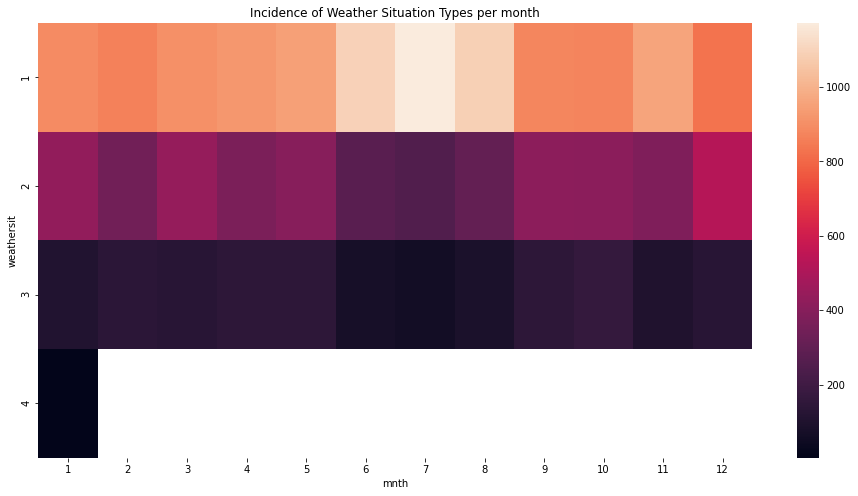

In [89]:
pivot_table5=pd.pivot_table(df_clean, values='cnt', index='weathersit', columns='mnth', aggfunc='count')
sns.heatmap(pivot_table5)
plt.title('Incidence of Weather Situation Types per month')
plt.savefig('6')

In [28]:
pivot_table5

mnth,1,2,3,4,5,6,7,8,9,10,11,12
weathersit,,,,,,,,,,,,
1,890.0,862.0,903.0,923.0,944.0,1093.0,1172.0,1086.0,879.0,875.0,958.0,828.0
2,428.0,342.0,441.0,372.0,401.0,275.0,254.0,302.0,414.0,412.0,378.0,525.0
3,108.0,137.0,129.0,142.0,143.0,72.0,62.0,87.0,144.0,164.0,101.0,130.0
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


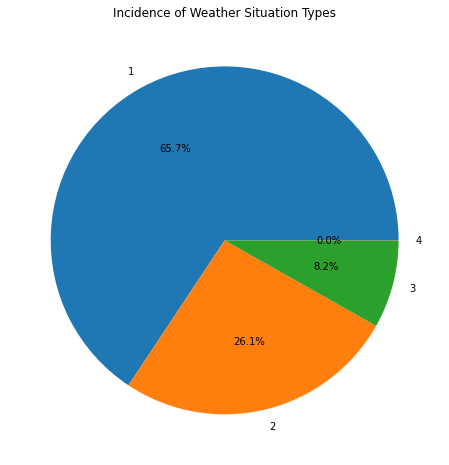

In [90]:
pivot_table5.sum(axis=1).plot(kind='pie', ylabel='', autopct='%1.1f%%')
chart5=plt.title('Incidence of Weather Situation Types')
plt.savefig('7')

**Takeaways:**
- Weather situation 1: most present in north emisphere summer, but the most common situation in any month.
- Weather situation 2: second most common weather situation.
- Weather situation 3: third incidence feature.
- Weather situation 4: least incidence feature. Only happened during 3 hours in january across 2 years data.


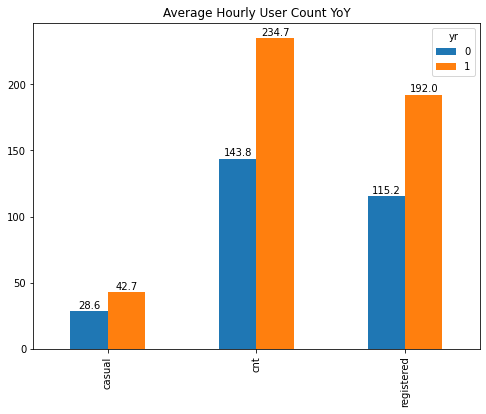

In [93]:
pivot_table6=pd.pivot_table(df_clean, values=['cnt','casual','registered'], columns='yr', aggfunc=np.mean)
ax=pivot_table6.plot(kind='bar', figsize=(8,6))
add_value_labels(ax)
pivot_table6[1]/pivot_table6[0] # +63,2% increase YoY
plt.title('Average Hourly User Count YoY')
plt.savefig('8')

In [91]:
pivot_table6[0].cnt


<Figure size 1152x576 with 0 Axes>

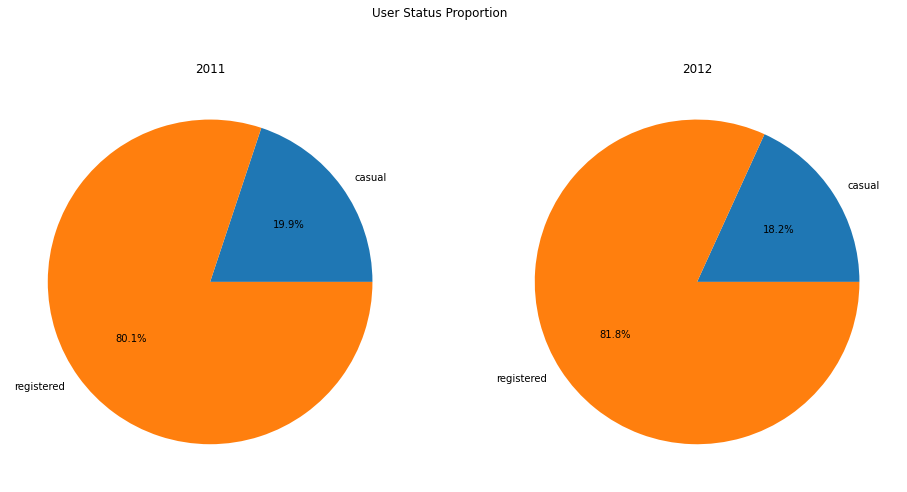

In [92]:
fig, (ax1,ax2) = plt.subplots(1,2)

fig.suptitle('User Status Proportion')

ax1.title.set_text('2011')
ax1.pie(
    df_clean.loc['2011',['casual','registered']].mean(), 
    labels=['casual','registered'],
    autopct='%1.1f%%')

ax2.title.set_text('2012')
ax2.pie(
    df_clean.loc['2012',['casual','registered']].mean(), 
    labels=['casual','registered'],
    autopct='%1.1f%%')

plt.savefig('9')

In [71]:
fig0 = go.Figure()

line3 = df_roll_7d.registered['2011']
line4 = df_roll_7d.casual['2011']

fig0.update_layout(
    title={
        'text': 'User Count Timeline [2011]',
        'x':0.5,
        'xanchor': 'center'})
fig0.add_trace(go.Scatter(x=line1.index,y=line1.values, mode='lines', name='Total User Count'))
fig0.add_trace(go.Scatter(x=line3.index,y=line3.values, mode='lines', name='Registered User Count'))
fig0.add_trace(go.Scatter(x=line4.index,y=line4.values, mode='lines', name='Casual User Count'))
fig0.add_trace(go.Scatter(x=marker1.index,y=marker1.values, mode='markers', name='Weekend'))
fig0.add_trace(go.Scatter(x=marker2.index,y=marker2.values, mode='markers', name='Holiday'))

In [70]:
fig1 = go.Figure()

line5 = df_roll_7d.registered['2012']
line6 = df_roll_7d.casual['2012']

fig1.update_layout(
    title={
        'text': 'User Count Timeline [2012]',
        'x':0.5,
        'xanchor': 'center'})
fig1.add_trace(go.Scatter(x=line2.index,y=line2.values, mode='lines', name='Working day'))
fig1.add_trace(go.Scatter(x=line5.index,y=line5.values, mode='lines', name='Registered User Count'))
fig1.add_trace(go.Scatter(x=line6.index,y=line6.values, mode='lines', name='Casual User Count'))
fig1.add_trace(go.Scatter(x=marker3.index,y=marker3.values, mode='markers', name='Weekend'))
fig1.add_trace(go.Scatter(x=marker4.index,y=marker4.values, mode='markers', name='Holiday'))

In [102]:
values=df_clean.loc['2011',['casual','registered']].sum()
labels=['casual','registered']

fig2=go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig2.update_layout(
    title={
    'text': 'Registered/Casual Users [2011]',
    'x':0.5,
    'xanchor': 'center'},
) 
fig2.show()

In [101]:
values=df_clean.loc['2012',['casual','registered']].sum()
labels=['casual','registered']

fig4=go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig4.update_layout(
    title={
    'text': 'Registered/Casual Users [2012]',
    'x':0.5,
    'xanchor': 'center'},
) 

fig4.show()

In [74]:
a = [str(i[0])+'&'+str(i[1]) for i in pivot_table2.index]

fig3=px.imshow(pivot_table2, labels=dict(x="Hour", y="Month+Weekday", color="User Count Average"),
                x=pivot_table2.columns,
                y=a)
fig3.update_layout(
    title={
        'text': 'Month+Weekday vs Hour Heatmap',
        'x':0.5,
        'xanchor': 'center'}) 
fig3.show()

In [105]:
table=dp.DataTable(df_dp)
users_total_2011=pivot_table6[0].cnt
users_total_2012=pivot_table6[1].cnt
percentual_var=pivot_table6[1].cnt/pivot_table6[0].cnt-1

dp.Report(
    dp.Page(
        dp.Group(
            dp.BigNumber(
                heading='Average Hourly User Count 2011', 
                value=f'{users_total_2011:.0f}',
                change="0%",
                is_upward_change=False
            ),
            dp.BigNumber(
                heading="Average Hourly User Count 2012", 
                value=f'{users_total_2012:.0f}',
                change=f'{percentual_var:.1%}',
                is_upward_change=True
            ),
            columns=2
        ),
        dp.Group(
            fig2,
            fig4,
            columns=2
        ),
        dp.Group(
            fig0,
            fig1,
            columns=2
        ),
        fig3,
        title='Business Report'
    ),
    dp.Page(
        table,
        title='Dataset Interactive Explorer'
    ) 
).publish(name='Data Report', open=True, type=dp.ReportType.DASHBOARD)


Publishing document and associated data - *please wait...*

Your report doesn't contain any text - did you know you can add text to your report from your browser once published?

Report successfully published at https://datapane.com/u/hanslemm/reports/data-report/ - you can edit and add additional text online

## 5 Evaluation